In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn
from datetime import date
from datetime import datetime
import math

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [3]:
data = pd.read_csv("../../final_data_to_submit/ANN0_ver.csv")

In [4]:
submission_file = pd.read_csv("../../updated_datasets/Cross Road Analytics Competition Submission.csv")

In [5]:
data.head()

,Unnamed: 0,UniqueID,y_test_pred
0,1158228,CLT21LV-101-10-1,0.905812
1,1158229,CLT21LV-101-10-10,0.903065
2,1158230,CLT21LV-101-10-11,0.905664
3,1158231,CLT21LV-101-10-12,0.909014
4,1158232,CLT21LV-101-10-13,0.897940


In [39]:
submission_file.head()

,UniqueID,isAttended
0,CLT21LV-101-10-1,NaN
1,CLT21LV-101-10-10,NaN
2,CLT21LV-101-10-11,NaN
3,CLT21LV-101-10-12,NaN
4,CLT21LV-101-10-13,NaN


In [5]:
submission_file = submission_file.merge(data, on = 'UniqueID')

In [41]:
submission_file.head()

,UniqueID,isAttended,Unnamed: 0,y_test_pred
0,CLT21LV-101-10-1,NaN,1158228,0.905812
1,CLT21LV-101-10-10,NaN,1158229,0.903065
2,CLT21LV-101-10-11,NaN,1158230,0.905664
3,CLT21LV-101-10-12,NaN,1158231,0.909014
4,CLT21LV-101-10-13,NaN,1158232,0.897940


In [6]:
submission_file = submission_file.drop(labels=['isAttended', 'Unnamed: 0'], axis = 1)

In [43]:
submission_file.head()

,UniqueID,y_test_pred
0,CLT21LV-101-10-1,0.905812
1,CLT21LV-101-10-10,0.903065
2,CLT21LV-101-10-11,0.905664
3,CLT21LV-101-10-12,0.909014
4,CLT21LV-101-10-13,0.897940


In [7]:
submission_file['isAttended'] = None

i = 0
while i < len(submission_file['y_test_pred']):
    if submission_file['y_test_pred'][i] >= 0.5:
        submission_file['isAttended'][i] = 1
    elif submission_file['y_test_pred'][i] <0.5:
        submission_file['isAttended'][i] = 0

    i+=1
        

/var/folders/mh/9fr225sj6bd0qgb1553s86dw0000gn/T/ipykernel_97263/1547604385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_file['isAttended'][i] = 1
/var/folders/mh/9fr225sj6bd0qgb1553s86dw0000gn/T/ipykernel_97263/1547604385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_file['isAttended'][i] = 0


In [8]:
submission_file = submission_file.drop(labels=['y_test_pred'],axis=1)
submission_file.head()

,UniqueID,isAttended
0,CLT21LV-101-10-1,1
1,CLT21LV-101-10-10,1
2,CLT21LV-101-10-11,1
3,CLT21LV-101-10-12,1
4,CLT21LV-101-10-13,1


In [9]:
submission_file['isAttended'] = submission_file['isAttended'].replace(1,"Yes")
submission_file['isAttended'] = submission_file['isAttended'].replace(0,"No")

In [10]:
submission_file.head()

,UniqueID,isAttended
0,CLT21LV-101-10-1,Yes
1,CLT21LV-101-10-10,Yes
2,CLT21LV-101-10-11,Yes
3,CLT21LV-101-10-12,Yes
4,CLT21LV-101-10-13,Yes


In [11]:
submission_file['UniqueID'].shape

(128688,)

In [18]:
submission_file.to_csv("../../actual_final_data_to_submit/ANN0_predictions.csv")

In [3]:
verification = pd.read_csv("../../verification_data/ANN1_ver.csv")

In [4]:
y_test_pred = verification['y_test_pred']

In [27]:
verification['predicted'] = None

i = 0
while i < len(verification['y_test_pred']):
    if verification['y_test_pred'][i] >= 0.5:
        verification['predicted'][i] = 1
    elif verification['y_test_pred'][i] <0.5:
        verification['predicted'][i] = 0

    i+=1
        

/var/folders/mh/9fr225sj6bd0qgb1553s86dw0000gn/T/ipykernel_19637/3539561248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verification['predicted'][i] = 1
/var/folders/mh/9fr225sj6bd0qgb1553s86dw0000gn/T/ipykernel_19637/3539561248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verification['predicted'][i] = 0


In [28]:
confusion_matrix(y_true = list(verification['isAttended']), y_pred = list(verification['predicted']))

array([[ 361,  424],
       [  15, 2378]])

In [29]:
accuracy_score(y_true = list(verification['isAttended']), y_pred = list(verification['predicted']))


0.8618628067967276

In [25]:
submission_file[['isAttended']].unique()

KeyError: "None of [Index(['isAttended'], dtype='object')] are in the [index]"

# Model 2

In [5]:
data = pd.read_csv("../../final_data_to_submit/ANN1_ver.csv")

In [6]:
submission_file = pd.read_csv("../../updated_datasets/Cross Road Analytics Competition Submission.csv")

In [7]:
submission_file = submission_file.merge(data, on = 'UniqueID')

In [8]:
submission_file = submission_file.drop(labels=['isAttended', 'Unnamed: 0'], axis = 1)

<AxesSubplot:ylabel='y_test_pred'>

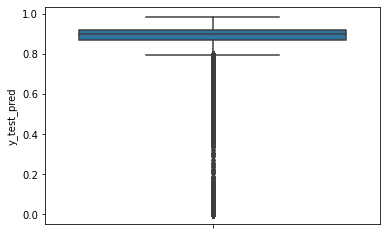

In [9]:
sns.boxplot(y =submission_file['y_test_pred'])


In [10]:
submission_file['isAttended'] = None

i = 0
while i < len(submission_file['y_test_pred']):
    if submission_file['y_test_pred'][i] >= 0.70:
        submission_file['isAttended'][i] = 1
    elif submission_file['y_test_pred'][i] <0.7:
        submission_file['isAttended'][i] = 0

    i+=1
        

/var/folders/mh/9fr225sj6bd0qgb1553s86dw0000gn/T/ipykernel_22807/2342184394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_file['isAttended'][i] = 1
/var/folders/mh/9fr225sj6bd0qgb1553s86dw0000gn/T/ipykernel_22807/2342184394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_file['isAttended'][i] = 0


In [11]:
submission_file = submission_file.drop(labels=['y_test_pred'],axis=1)
submission_file.head()

,UniqueID,isAttended
0,CLT21LV-101-10-1,1
1,CLT21LV-101-10-10,1
2,CLT21LV-101-10-11,1
3,CLT21LV-101-10-12,1
4,CLT21LV-101-10-13,1


In [12]:
submission_file['isAttended'] = submission_file['isAttended'].replace(1,"Yes")
submission_file['isAttended'] = submission_file['isAttended'].replace(0,"No")

In [13]:
submission_file.head()

,UniqueID,isAttended
0,CLT21LV-101-10-1,Yes
1,CLT21LV-101-10-10,Yes
2,CLT21LV-101-10-11,Yes
3,CLT21LV-101-10-12,Yes
4,CLT21LV-101-10-13,Yes


In [14]:
submission_file['isAttended'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
len(submission_file[submission_file['isAttended'] =='Yes'])

118998

In [12]:
submission_file.to_csv("../../actual_final_data_to_submit/ANN1_predictions6.csv")

# RF model

In [19]:
rf_model = pd.read_csv("../../final_data_to_submit/RF_model3.csv")

In [21]:
rf_model.head()

,Unnamed: 0,UniqueID,predictions
0,0,CLT21LV-101-10-1,1
1,1,CLT21LV-101-10-10,1
2,2,CLT21LV-101-10-11,1
3,3,CLT21LV-101-10-12,1
4,4,CLT21LV-101-10-13,1


In [22]:
rf_model['predictions'] = rf_model['predictions'].replace(1,"Yes")
rf_model['predictions'] = rf_model['predictions'].replace(0,"No")

In [23]:
len(rf_model[rf_model['predictions'] == 'Yes'])

119528

In [24]:
rf_model.to_csv("../../actual_final_data_to_submit/RF_model3.csv")